# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [251]:
import pandas as pd
import sqlite3
# from sklearn.ensemble import RandomForestClassifier
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.core.display import Image, display
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
df = pd.read_csv('/content/drive/MyDrive/ex08_42/checker_submits.csv')
df

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


In [160]:
df['hour'] = df['timestamp'].astype('datetime64[ns]').dt.hour
df

,uid,labname,numTrials,timestamp,hour
0,user_4,project1,1,2020-04-17 05:19:02.744528,5
1,user_4,project1,2,2020-04-17 05:22:45.549397,5
2,user_4,project1,3,2020-04-17 05:34:24.422370,5
3,user_4,project1,4,2020-04-17 05:43:27.773992,5
4,user_4,project1,5,2020-04-17 05:46:32.275104,5
...,...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966,20
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900,20
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761,20
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806,20


In [161]:
day_of_weak = list(i for i in df['timestamp'].astype('datetime64[ns]').dt.dayofweek)


In [162]:
df = df.drop('timestamp', axis=1)
df

,uid,labname,numTrials,hour
0,user_4,project1,1,5
1,user_4,project1,2,5
2,user_4,project1,3,5
3,user_4,project1,4,5
4,user_4,project1,5,5
...,...,...,...,...
1681,user_19,laba06s,9,20
1682,user_1,laba06s,6,20
1683,user_1,laba06s,7,20
1684,user_1,laba06s,8,20


In [163]:
onehotencoder = OneHotEncoder()

In [164]:
drop_enc = OneHotEncoder(drop='first').fit(df)

In [165]:
scaler = StandardScaler()

In [166]:
df_1 = pd.get_dummies(df, prefix=['uid', 'labname'], columns=['uid', 'labname'])

In [167]:
df_1[['numTrials', 'hour']] = scaler.fit_transform(df[['numTrials', 'hour']])

In [177]:
df_1['dayofweek'] = day_of_weak

In [178]:
df_1

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,dayofweek
0,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
1,2,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
2,3,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,4,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
4,5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
1682,6,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
1683,7,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
1684,8,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3


In [179]:
df_1.to_csv('/content/drive/MyDrive/ex08_42/dayofweek.csv', index = False)

In [180]:
df_1 = pd.read_csv('/content/drive/MyDrive/ex08_42/dayofweek.csv')
df_1

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,dayofweek
0,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
1,2,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
2,3,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,4,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
4,5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
1682,6,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
1683,7,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
1684,8,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3


In [181]:
X = df_1.drop('dayofweek', axis=1)
y = day_of_weak

In [182]:
y_pred_naive = np.array([np.argmax(np.bincount(y))] * len(y))

In [183]:
accuracy_score(y, y_pred_naive)

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [184]:
clf = LogisticRegression(random_state=21, fit_intercept=False)

In [189]:
clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(fit_intercept=False, random_state=21)

In [193]:
y_pred = clf.predict(X)
y_pred

array([4, 4, 4, ..., 3, 3, 3])

In [195]:
accuracy_score(y, y_pred)

0.5759193357058126

In [196]:
def plot_feature_importances(coefs, features, n=10):
    fig, ax = plt.subplots(figsize=(15, 8))
    coefs /= coefs.sum()
    indices = coefs.argsort()[::-1][:n]
    ax.barh(np.arange(n), coefs[indices], color='mediumslateblue')
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(features[indices])
    ax.invert_yaxis()
    plt.show()

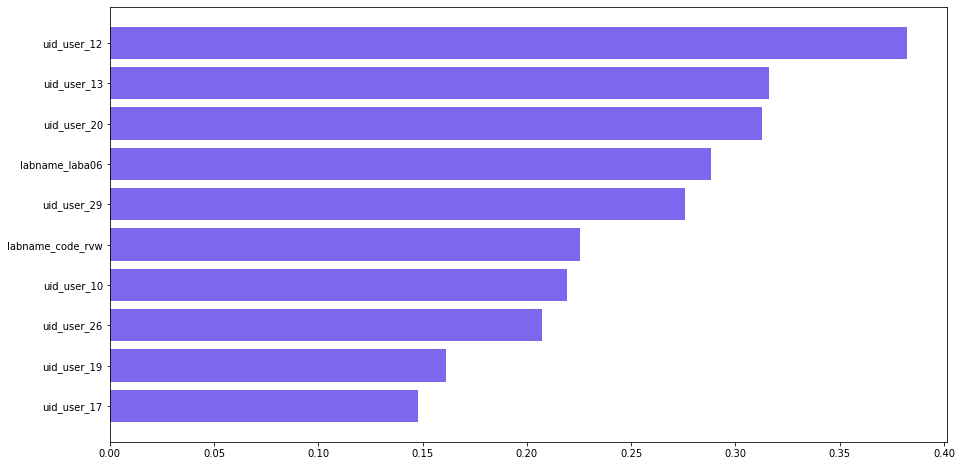

In [197]:
plot_feature_importances(clf.coef_.mean(axis=0), X.columns)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [216]:
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21)).fit(X, y)

In [217]:
y_pred = clf.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)


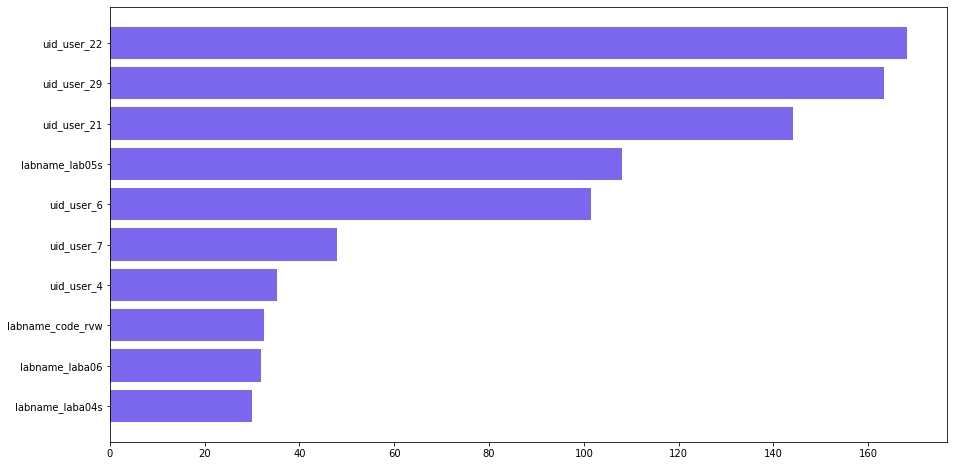

In [218]:
plot_feature_importances(clf.coef_.mean(axis=0), X.columns)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [ ]:
forest = DecisionTreeClassifier(max_depth=4, random_state=21)
forest.fit(X, y)
cv_pred = forest.predict(X)
accuracy_score(y, cv_pred)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [243]:
param_grid = {'max_depth': np.arange(3, 21)}

clf2 = GridSearchCV(clf, param_grid, scoring='accuracy', n_jobs=-1)

In [244]:
clf2.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4, random_state=21),
             n_jobs=-1,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20])},
             scoring='accuracy')

In [245]:
clf2.best_params_

{'max_depth': 16}

In [246]:
y_pred = clf2.predict(X)
y_pred

array([4, 4, 4, ..., 3, 3, 3])

In [247]:
accuracy_score(y, y_pred)

0.9608540925266904

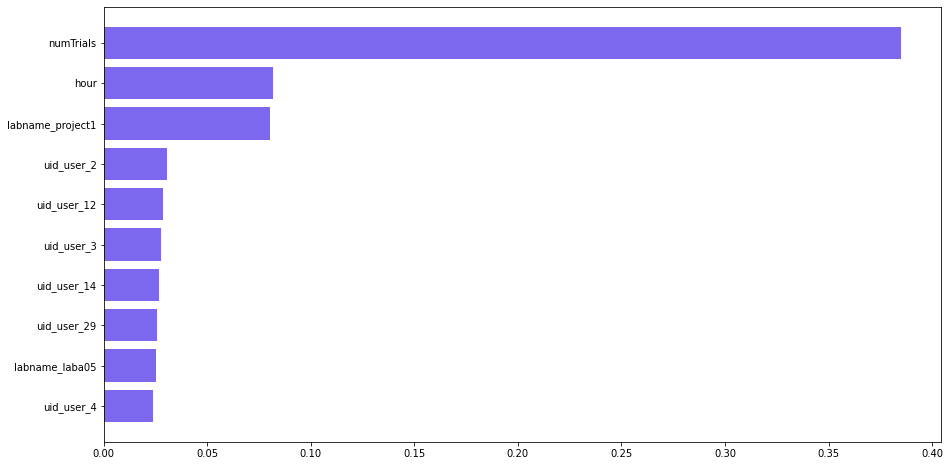

In [249]:
plot_feature_importances(clf2.best_estimator_.feature_importances_, X.columns)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [253]:
forest = RandomForestClassifier(n_estimators=100, max_depth = 25, random_state=21)
forest.fit(X, y)
cv_pred = forest.predict(X)
accuracy_score(y, cv_pred)

1.0

In [260]:
param_grid = {'n_estimators': np.arange(10, 200, 10),
              'max_depth': np.arange(3, 21)}

cv = GridSearchCV(forest, param_grid, scoring='accuracy', n_jobs=-1)

In [ ]:
cv.fit(X, y)

In [ ]:
cv.best_params_

In [ ]:
y_pred = clf2.predict(X)
y_pred

In [ ]:
plot_feature_importances(clf2.best_estimator_.feature_importances_, X.columns)